
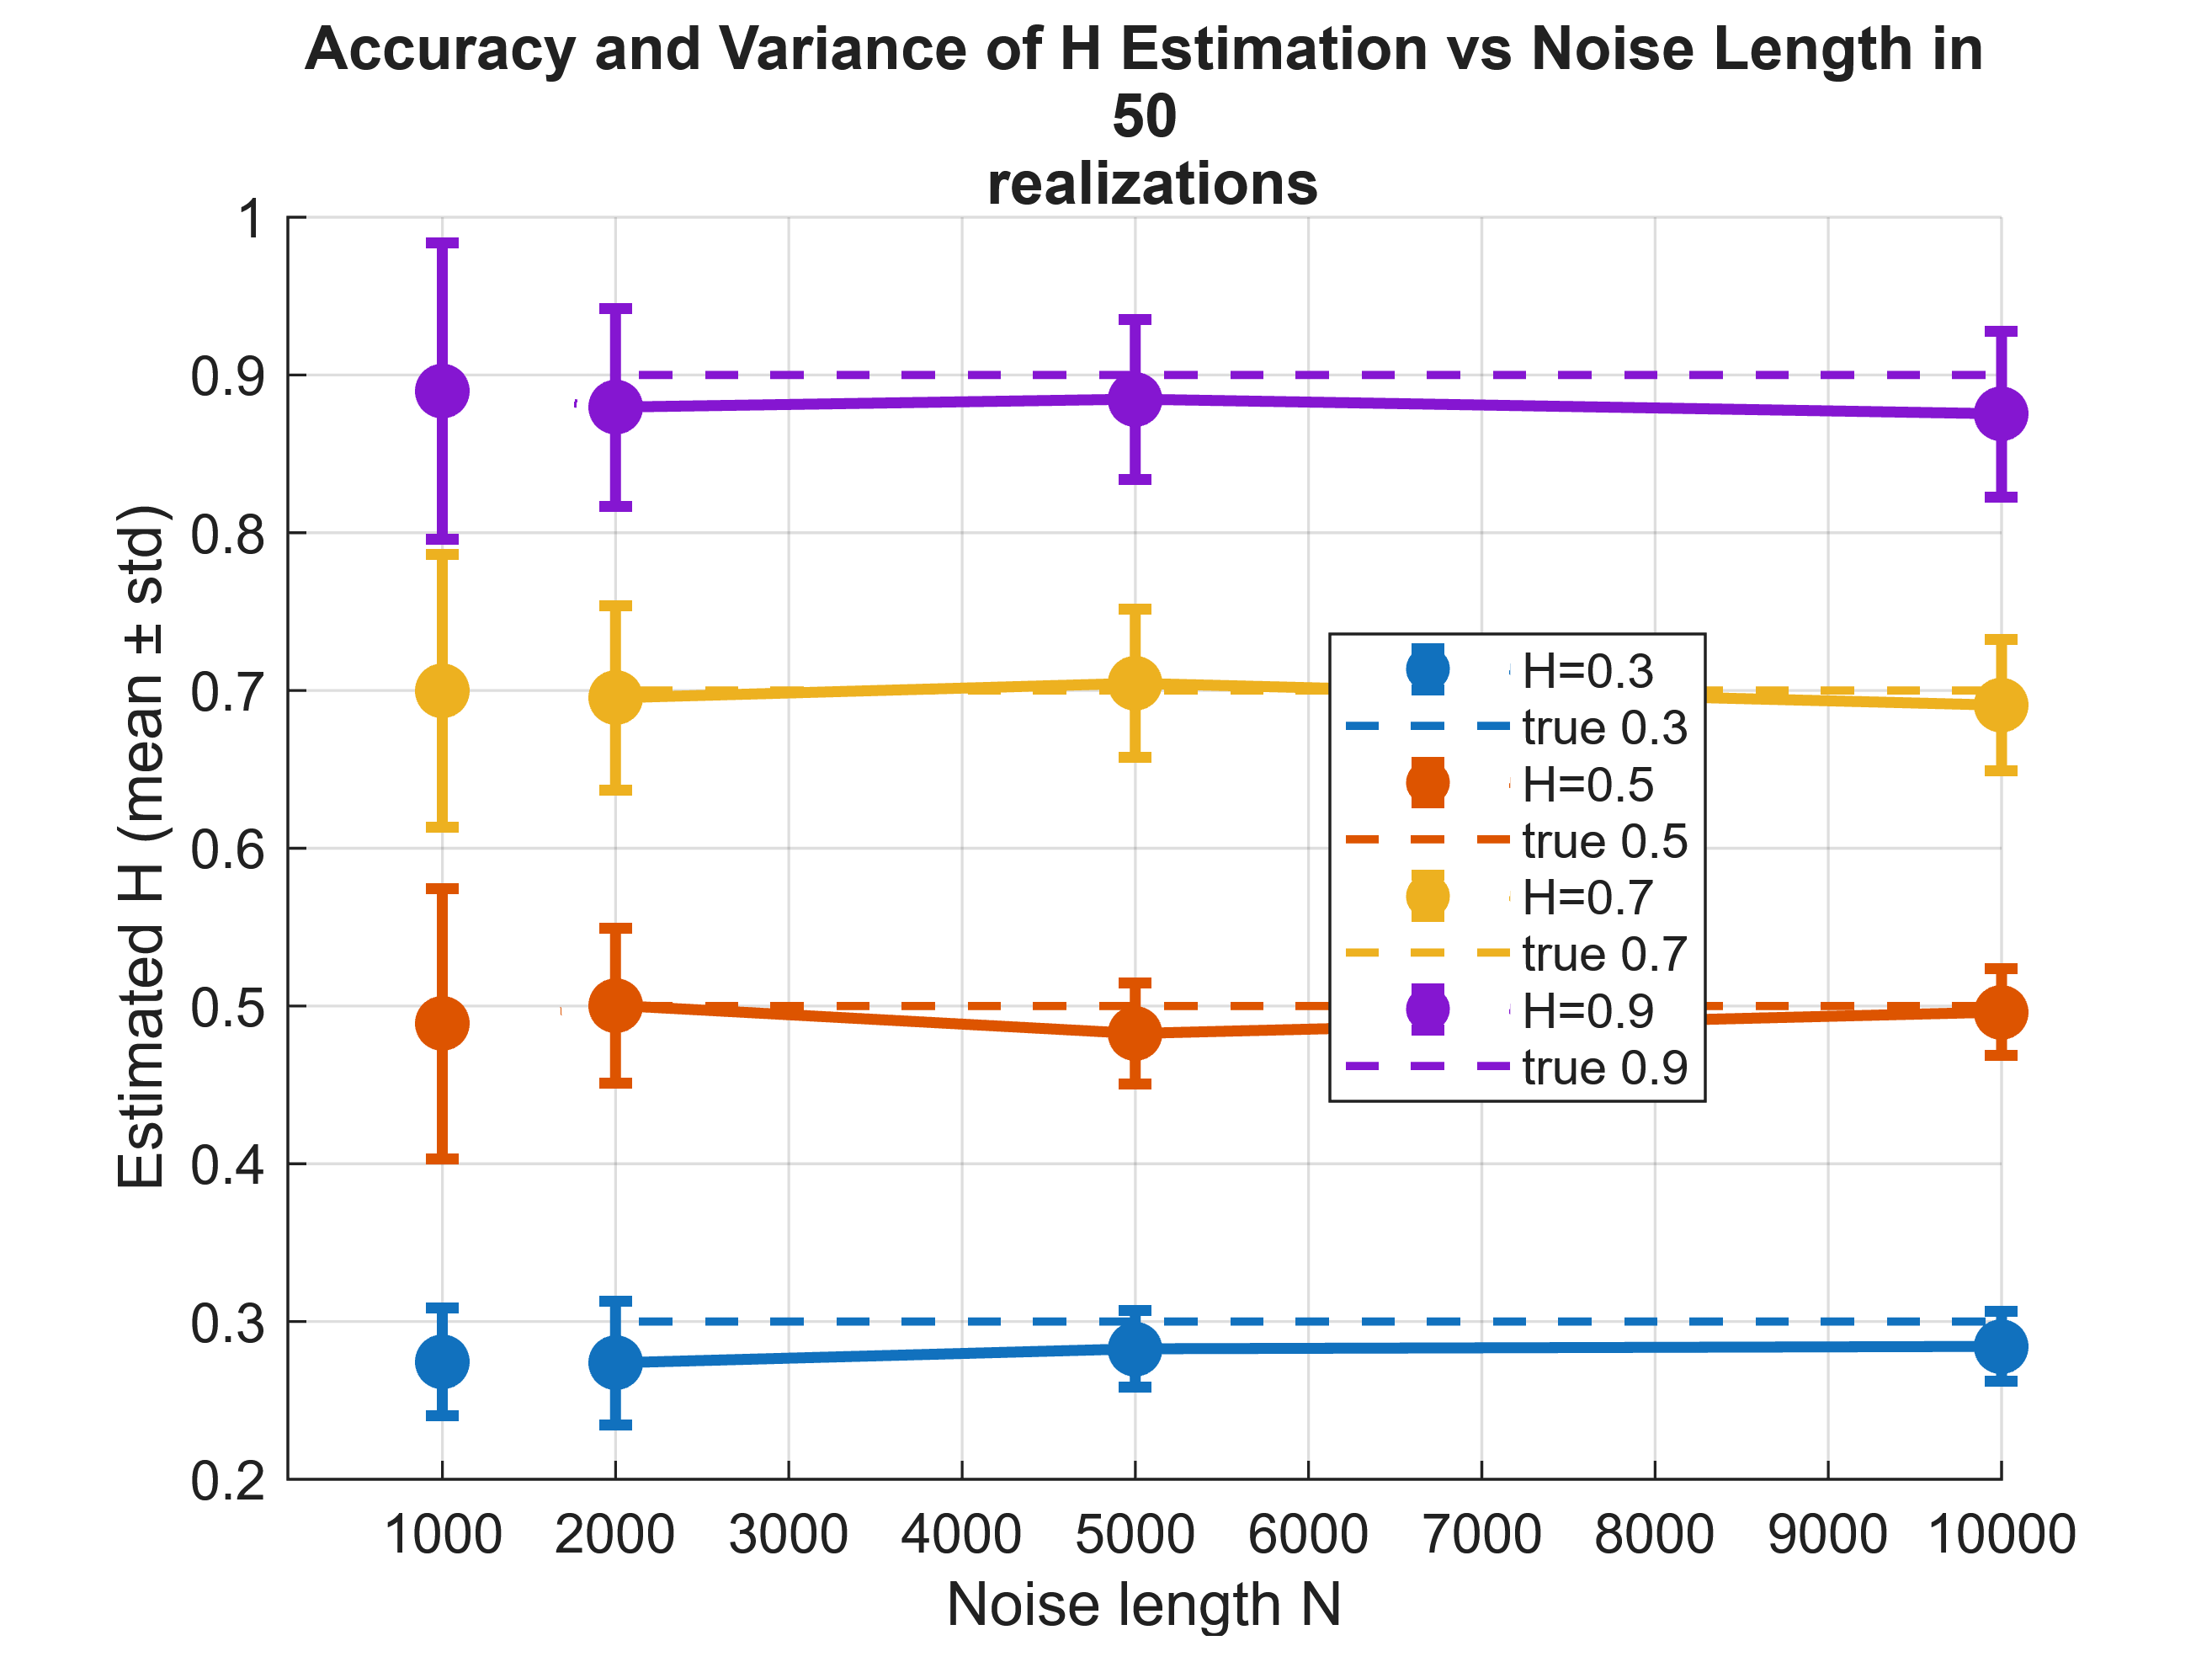

In [1]:
clear; close all; clc;

%% PARAMETERS
Hvals  = [0.3, 0.5, 0.7, 0.9];          % true H values
Nvals  = [1000, 2000, 5000, 10000];
numR   = 50;                       % number of realizations
numH   = numel(Hvals);
numN   = numel(Nvals);

colors = lines(numH);

%% STORAGE FOR ESTIMATED H
Hest = zeros(numH, numN, numR);    % Hest(hi, ni, r)

%% ---------------------------------------------------------
% MAIN LOOP: MULTIPLE REALIZATIONS
% ---------------------------------------------------------
for hi = 1:numH
    Htrue = Hvals(hi);

    for ni = 1:numN
        N = Nvals(ni);

        for r = 1:numR
            % Generate fBm
            x = wfbm(Htrue, N);

            % Wavelet leader multifractal analysis
            [~, ~, cp, ~] = dwtleader(x);

            % Estimated H = first cumulant C1
            Hest(hi, ni, r) = cp(1);
        end
    end
end

%% ---------------------------------------------------------
% COMPUTE MEAN AND VARIANCE OF ESTIMATED H
% ---------------------------------------------------------
Hmean = mean(Hest, 3);
Hstd  = std(Hest, 0, 3);

%% ---------------------------------------------------------
% PLOT: ESTIMATED H VS NOISE LENGTH (WITH ERROR BARS)
% ---------------------------------------------------------
figure; hold on;

for hi = 1:numH
    errorbar(Nvals, Hmean(hi,:), Hstd(hi,:), ...
        '-o', 'LineWidth', 2, 'Color', colors(hi,:), ...
        'MarkerSize', 8, 'MarkerFaceColor', colors(hi,:));

    plot(Nvals, Hvals(hi)*ones(size(Nvals)), '--', ...
        'Color', colors(hi,:), 'LineWidth', 1.5); % true H line
end

xlabel("Noise length N")
ylabel("Estimated H (mean ± std)")
title(["Accuracy and Variance of H Estimation vs Noise Length in", num2str(numR), " realizations"])
legend("H=0.3","true 0.3","H=0.5","true 0.5","H=0.7","true 0.7","H=0.9","true 0.9", ...
       "Location","NorthWest")
grid on